# Evaluate simulation using zstar

In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import cartopy
import seawater as sw

calc
tb
IconData
plotting
view
calc
tb
IconData
plotting
view
quickplots
quickplots


In [3]:
ccrs_proj = cartopy.crs.PlateCarree()

## Specify data set

Reference data set:

In [4]:
run = 'exp.jkr2001'
runname = ''
gname = 'r2b4_oce_r0003'
lev = 'L40'

path_data     = f'/work/mh0033/m300029/icon/zstar2/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'

In [5]:
IcD1 = pyic.IconData(
    fname        = run+'_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    do_triangulation    = False,
    omit_last_file      = False,
    calc_coeff          = False,
    calc_coeff_mappings = False,
              )

Comparison data set:

In [6]:
run = 'jkr2002'
runname = ''
gname = 'r2b4_oce_r0003'
lev = 'L40'

path_data     = f'/work/mh0033/m300029/icon/zstar2/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res1.00_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'

In [7]:
IcD2 = pyic.IconData(
    fname        = run+'_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    do_triangulation    = False,
    omit_last_file      = False,
    calc_coeff          = False,
    calc_coeff_mappings = False,
              )

## Specify time and region

In [8]:
IcD = IcD1

t1 = '1940-02-01'
t2 = '1941-01-01'

ic1 = np.argmin((IcD.clon+30)**2+(IcD.clat-26)**2)
ic2 = np.argmin((IcD.clon+50)**2+(IcD.clat-45)**2)
iz = np.argmin((IcD.depthc-0)**2)

In [9]:
iz20, iz50, iz100, iz200 = pyic.indfind([20,50,100,200], IcD.depthc)

## Load data

In [10]:
so1, it_ave   = pyic.time_average(IcD1, 'so', t1=t1, t2=t2, iz='all')
so2, it_ave   = pyic.time_average(IcD2, 'so', t1=t1, t2=t2, iz='all')
so1[so1==0.] = np.ma.masked
so2[so2==0.] = np.ma.masked

In [11]:
lon, lat, so1i = pyic.interp_to_rectgrid(so1, fpath_ckdtree)
lon, lat, so2i = pyic.interp_to_rectgrid(so2, fpath_ckdtree)

In [12]:
zos1, it_ave   = pyic.time_average(IcD1, 'zos', t1=t1, t2=t2, iz='all')
zos2, it_ave   = pyic.time_average(IcD2, 'eta_c', t1=t1, t2=t2, iz='all')

In [13]:
lon, lat, zos1i = pyic.interp_to_rectgrid(zos1, fpath_ckdtree)
lon, lat, zos2i = pyic.interp_to_rectgrid(zos2, fpath_ckdtree)

## Derive new vertical coordinate

The new vertical coordinate is given by:
$$
z^* = H \frac{z-\eta}{H+\eta}
$$

From this, we can derive the new layer thickness as:
$$
\Delta z^* = \frac{H}{H+\eta} \Delta z
$$

In [14]:
IcD = IcD2
zos = zos2
so = so2

### Checking topography

In [15]:
# bottom index
kbot = IcD.wet_c.sum(axis=0).astype(int)-1
iall = np.arange(IcD.clon.size, dtype=int)

In [16]:
topo = IcD.depthc[kbot] * IcD.wet_c[0,:]

In [17]:
lon, lat, topoi = pyic.interp_to_rectgrid(topo, fpath_ckdtree)

<IPython.core.display.Javascript object>


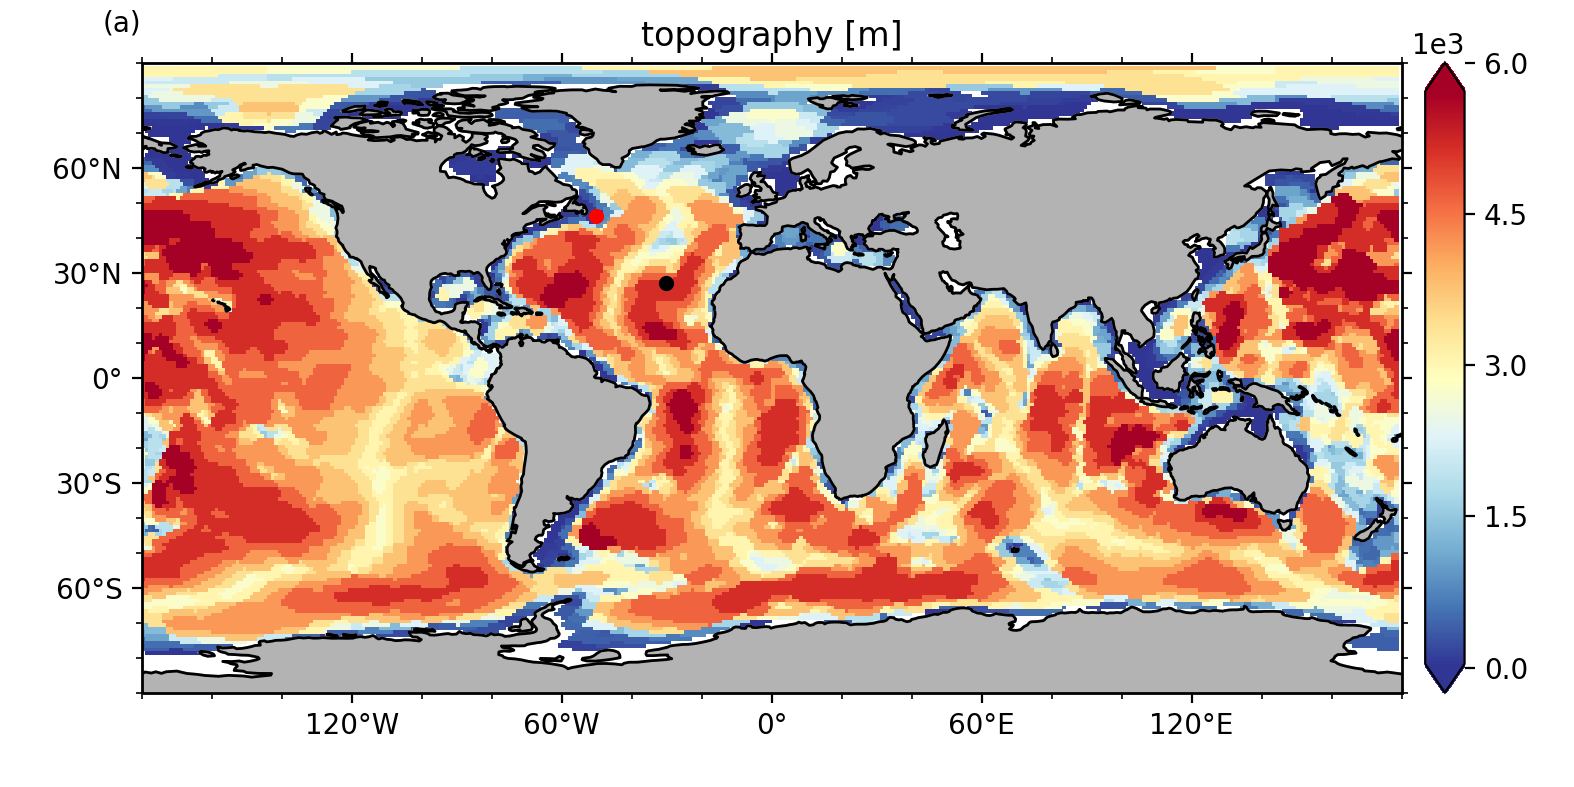

In [18]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, topoi, ax=ax, cax=cax, clim='auto',
              transform=ccrs_proj)
ax.set_title(f'topography [m]')

for ax in hca:
    pyic.plot_settings(ax, template='global')
    ax.scatter(IcD.clon[ic1], IcD.clat[ic1], c='k', s=20)
    ax.scatter(IcD.clon[ic2], IcD.clat[ic2], c='r', s=20)

### Plotting scale factor $\frac{H}{H+\eta}$

In [19]:
zstar_fac = topo / (topo+zos)

In [20]:
lon, lat, zstar_faci = pyic.interp_to_rectgrid(zstar_fac, fpath_ckdtree)

<IPython.core.display.Javascript object>


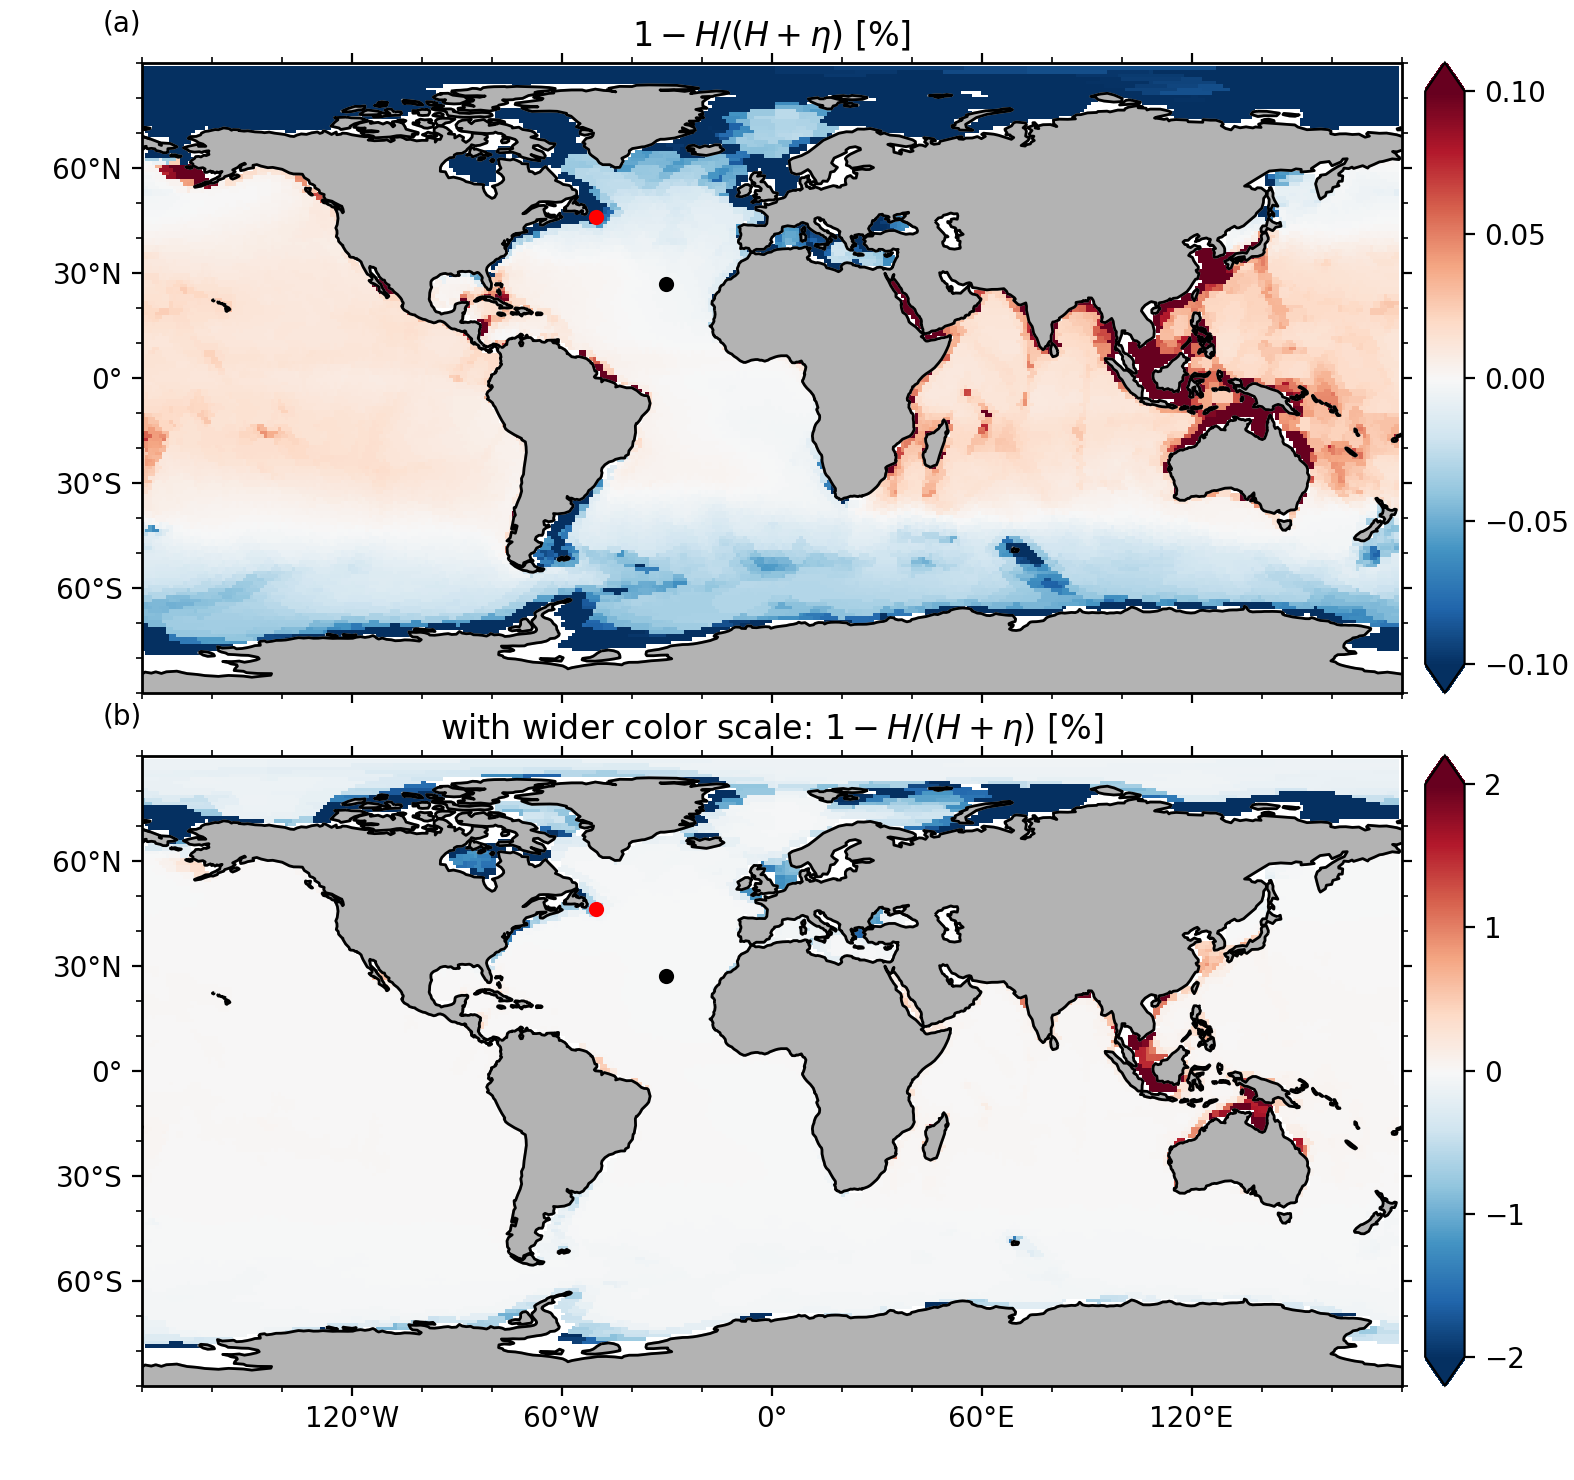

In [21]:
hca, hcb = pyic.arrange_axes(1,2, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (1-zstar_faci)*100, ax=ax, cax=cax, clim=0.1,
              transform=ccrs_proj)
ax.set_title(f'$1-H/(H+\eta)$ [%]')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (1-zstar_faci)*100, ax=ax, cax=cax, clim=2.,
              transform=ccrs_proj)
ax.set_title(f'with wider color scale: $1-H/(H+\eta)$ [%]')

for ax in hca:
    pyic.plot_settings(ax, template='global')
    ax.scatter(IcD.clon[ic1], IcD.clat[ic1], c='k', s=20)
    ax.scatter(IcD.clon[ic2], IcD.clat[ic2], c='r', s=20)

### Comparing layer thickness

In [22]:
depth_star = zstar_fac[np.newaxis,:] * (IcD.depthi[:,np.newaxis]-zos2[np.newaxis,:])
depth_starc = 0.5*(depth_star[1:,:]+depth_star[:-1,:])

In [23]:
dzstar = depth_star[1:]-depth_star[:-1]
dzstar = np.ma.array(dzstar, mask=IcD.wet_c==0.)

In [24]:
# dzstar[:,ic]

In [25]:
dzw = np.ma.array(IcD.dzw, mask=IcD.wet_c==0.)
# # ratio between old and new layer thickness
# dz_dzstar = dzw/dzstar
# # maximum difference in each water column
# dz_dzstar_max = dz_dzstar.max(axis=0)
# kmax = np.argmax(dz_dzstar, axis=0)
# # maximum depth at which maximum difference occurs
# depth_max_diff = IcD.depthc[kmax]
# # interpolate to regular grid
# lon, lat, dz_dzstar_maxi = pyic.interp_to_rectgrid(dz_dzstar_max, fpath_ckdtree)
# lon, lat, depth_max_diffi = pyic.interp_to_rectgrid(depth_max_diff, fpath_ckdtree)
# lon, lat, zstar_faci = pyic.interp_to_rectgrid(zstar_fac, fpath_ckdtree)

In [26]:
#(dz_dzstar[:,ic]).min(), (dz_dzstar[:,ic]).max()

<IPython.core.display.Javascript object>


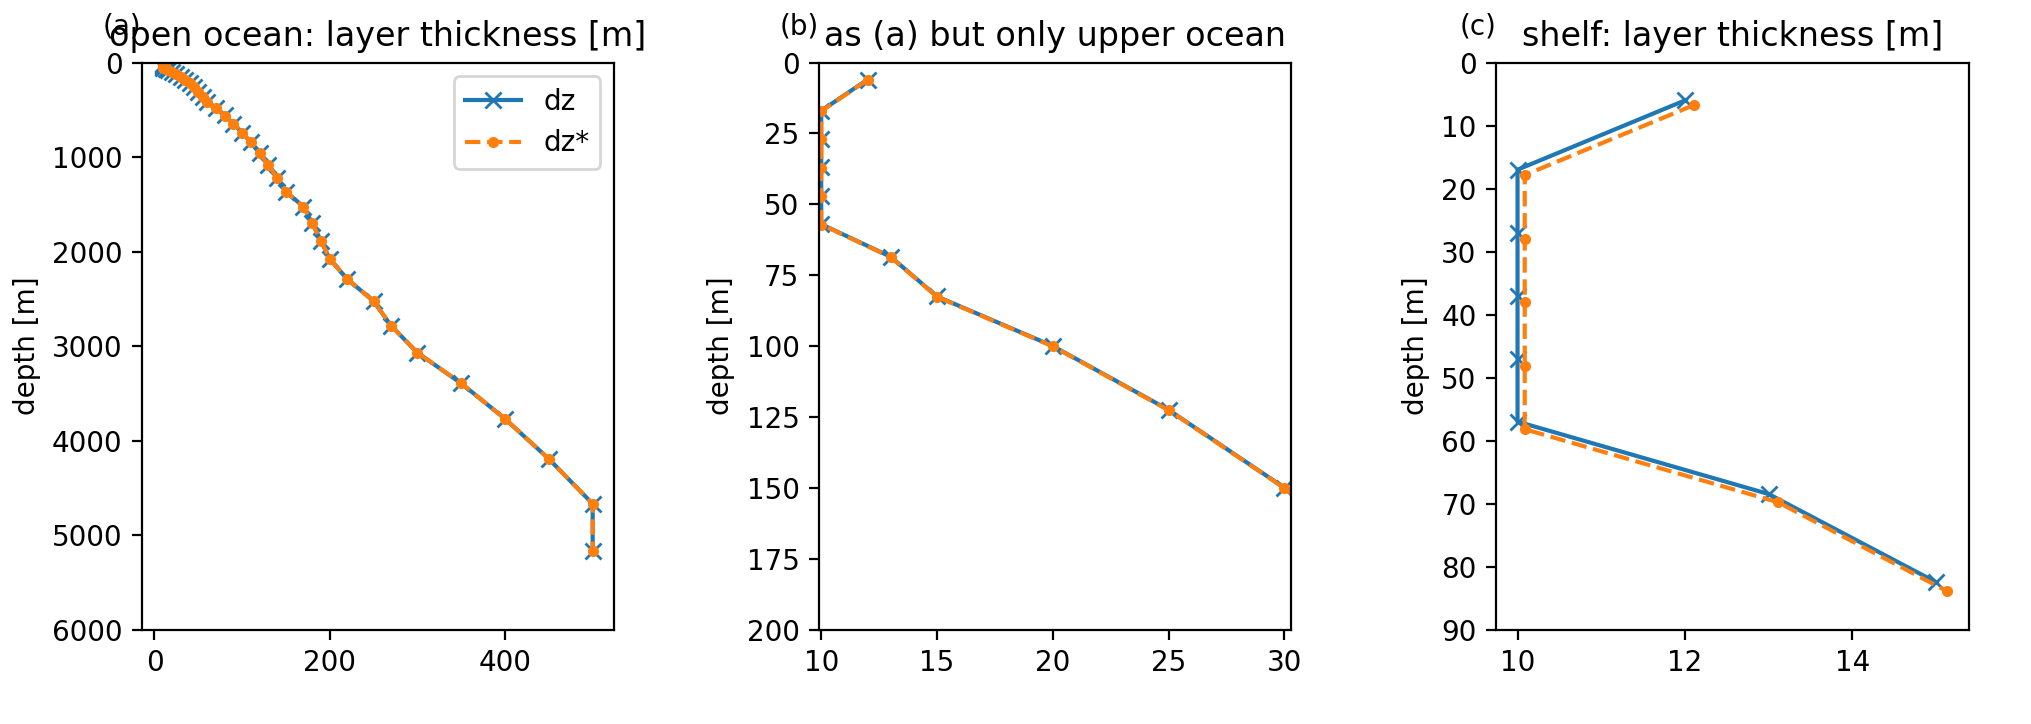

In [27]:
hca, hcb = pyic.arrange_axes(3,1, plot_cb=False, asp=1.2, fig_size_fac=1.8,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic1], IcD.depthc, marker='x', label='dz')
ax.plot(dzstar[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--', label='dz*')
ax.set_title('open ocean: layer thickness [m]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic1], IcD.depthc, marker='x')
ax.plot(dzstar[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--')
ax.set_title('as (a) but only upper ocean')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(dzw[:,ic2], IcD.depthc, marker='x', label='dz')
ax.plot(dzstar[:,ic2], depth_starc[:,ic2], marker='.', linestyle='--', label='dz*')
ax.set_title('shelf: layer thickness [m]')

for nn, ax in enumerate(hca):
    ax.ticklabel_format(useOffset=False)
    if nn==0:
        ax.set_ylim(6000,0)
    elif nn==1:
        ax.set_ylim(200,0)
        ax.set_xlim(dzw[:iz200,ic1].min()*0.99,dzw[:iz200,ic1].max()*1.01)
    else:
        ax.set_ylim(90,0)

### Remapping from z to z$^*$

In [28]:
ind_pos = zos>0.
ind_neg = zos<0.

In [29]:
zstarc = -1*depth_starc
zc = -1*IcD.depthc
# zstarc = np.tile(zc[:,np.newaxis],(1,IcD.clon.size)) + 2.
# depth_starc = -1*zstarc
# ind_neg = zos!=0.

In [30]:
sorm = np.ma.zeros((IcD.nz, IcD.clon.size))
sorm[:-1,ind_pos] =  (
    (so[1:,ind_pos]-so[:-1,ind_pos])/(zstarc[1:,ind_pos]-zstarc[:-1,ind_pos]) 
    * (zc[:-1,np.newaxis]-zstarc[:-1,ind_pos]) 
    + so[:-1,ind_pos]
)
sorm[-1,ind_pos] = so[-1,ind_pos]
sorm[1:,ind_neg] =  (
    (so[1:,ind_neg]-so[:-1,ind_neg])/(zstarc[1:,ind_neg]-zstarc[:-1,ind_neg]) 
    * (zc[1:,np.newaxis]-zstarc[:-1,ind_neg]) 
    + so[:-1,ind_neg]
)
sorm[0,ind_neg] = so[0,ind_neg]

<IPython.core.display.Javascript object>


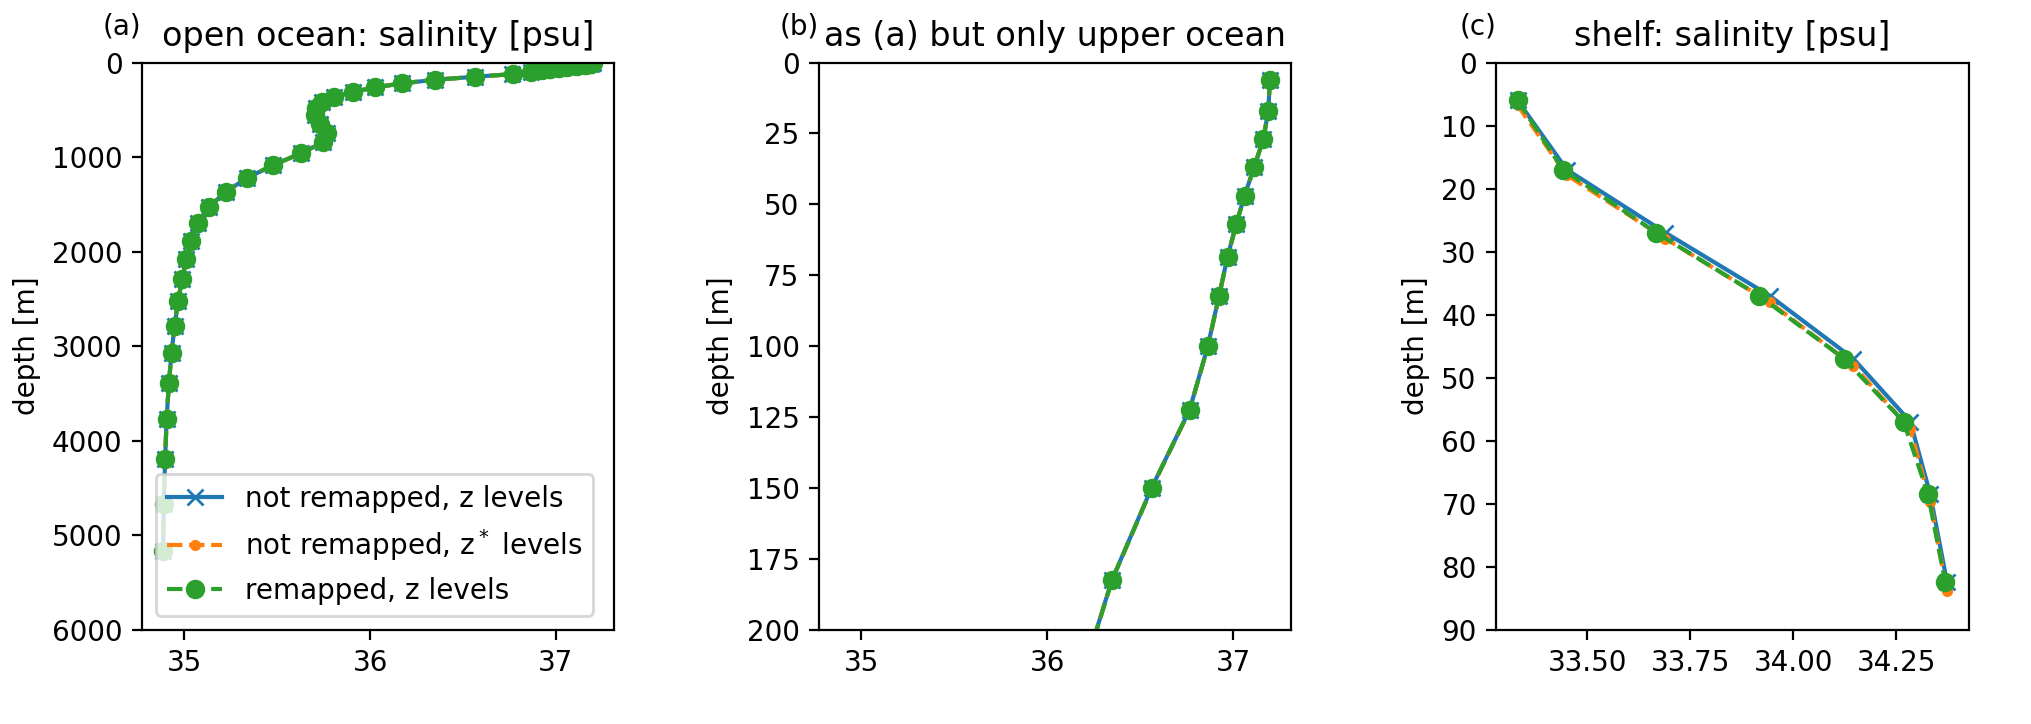

In [31]:
hca, hcb = pyic.arrange_axes(3,1, plot_cb=False, asp=1.2, fig_size_fac=1.8,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic1], IcD.depthc, marker='x', label='not remapped, z levels')
ax.plot(so[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--', label='not remapped, z$^*$ levels')
ax.plot(sorm[:,ic1], IcD.depthc, marker='o', linestyle='--', label='remapped, z levels')
ax.set_title('open ocean: salinity [psu]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic1], IcD.depthc, marker='x')
ax.plot(so[:,ic1], depth_starc[:,ic1], marker='.', linestyle='--')
ax.plot(sorm[:,ic1], IcD.depthc, marker='o', linestyle='--')
ax.set_title('as (a) but only upper ocean')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so[:,ic2], IcD.depthc, marker='x')
ax.plot(so[:,ic2], depth_starc[:,ic2], marker='.', linestyle='--')
ax.plot(sorm[:,ic2], IcD.depthc, marker='o', linestyle='--')
ax.set_title('shelf: salinity [psu]')

for nn, ax in enumerate(hca):
    ax.ticklabel_format(useOffset=False)
    if nn==0:
        ax.set_ylim(6000,0)
    elif nn==1:
        ax.set_ylim(200,0)
    else:
        ax.set_ylim(90,0)
#         ax.set_xlim(dzw[:iz200,ic].min()*0.99,dzw[:iz200,ic].max()*1.01)

In the above plots, the orange and green lines (not the individual points) should lie on top of each other.

In [32]:
lon, lat, sormi = pyic.interp_to_rectgrid(sorm, fpath_ckdtree)

<IPython.core.display.Javascript object>


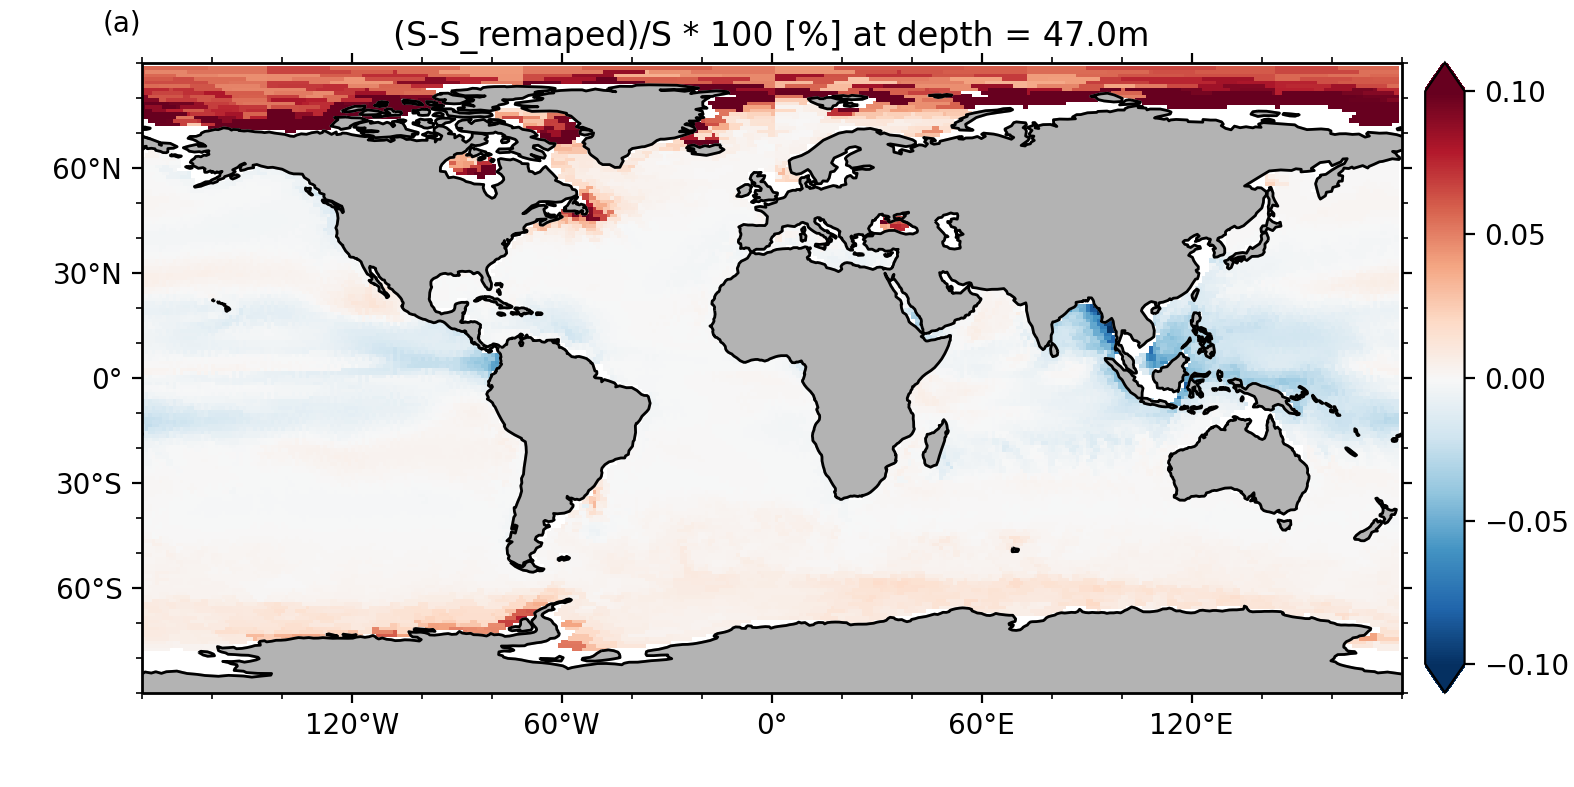

In [33]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1

iz = iz50
ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, (so2i[iz,:,:]-sormi[iz,:,:])/so2i[iz,:]*100, ax=ax, cax=cax, clim=0.1,
              transform=ccrs_proj)
ax.set_title(f'(S-S_remaped)/S * 100 [%] at depth = {IcD.depthc[iz]}m')


for ax in hca:
    pyic.plot_settings(ax, template='global')

## Comparing experiments

<IPython.core.display.Javascript object>


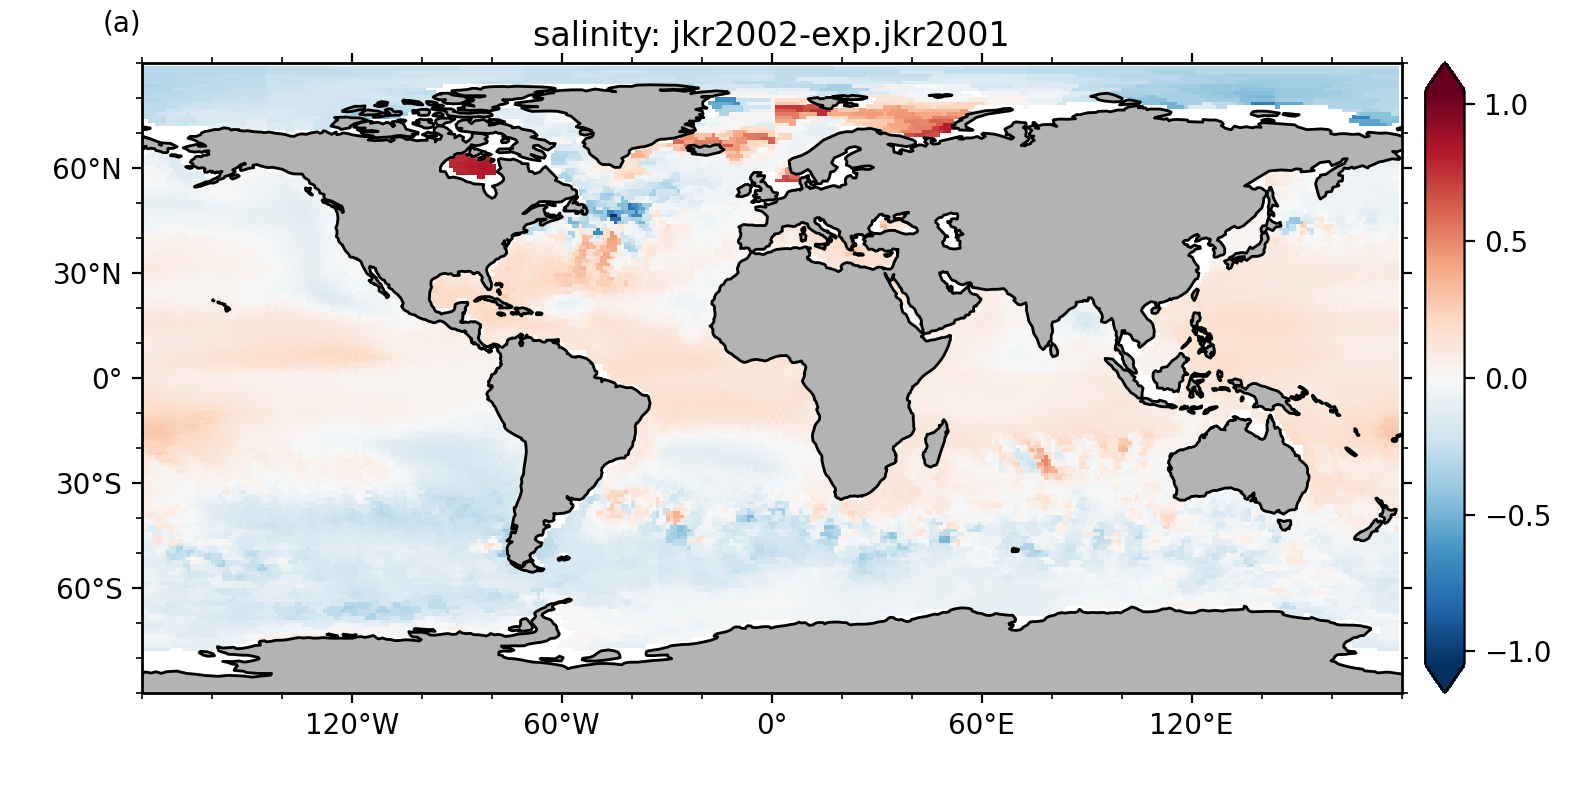

In [34]:
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1
clim = [34,37]

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# hm = pyic.shade(lon, lat, so1i, ax=ax, cax=cax, clim=clim,
#               transform=ccrs_proj)
# ax.set_title(f'{IcD1.run}')

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# hm = pyic.shade(lon, lat, so2i, ax=ax, cax=cax, clim=clim,
#               transform=ccrs_proj)
# ax.set_title(f'{IcD2.run}')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, so2i[iz,:,:]-so1i[iz,:,:], ax=ax, cax=cax, clim='sym',
              transform=ccrs_proj)
ax.set_title(f'salinity: {IcD2.run}-{IcD1.run}')


for ax in hca:
    pyic.plot_settings(ax, template='global')

<IPython.core.display.Javascript object>


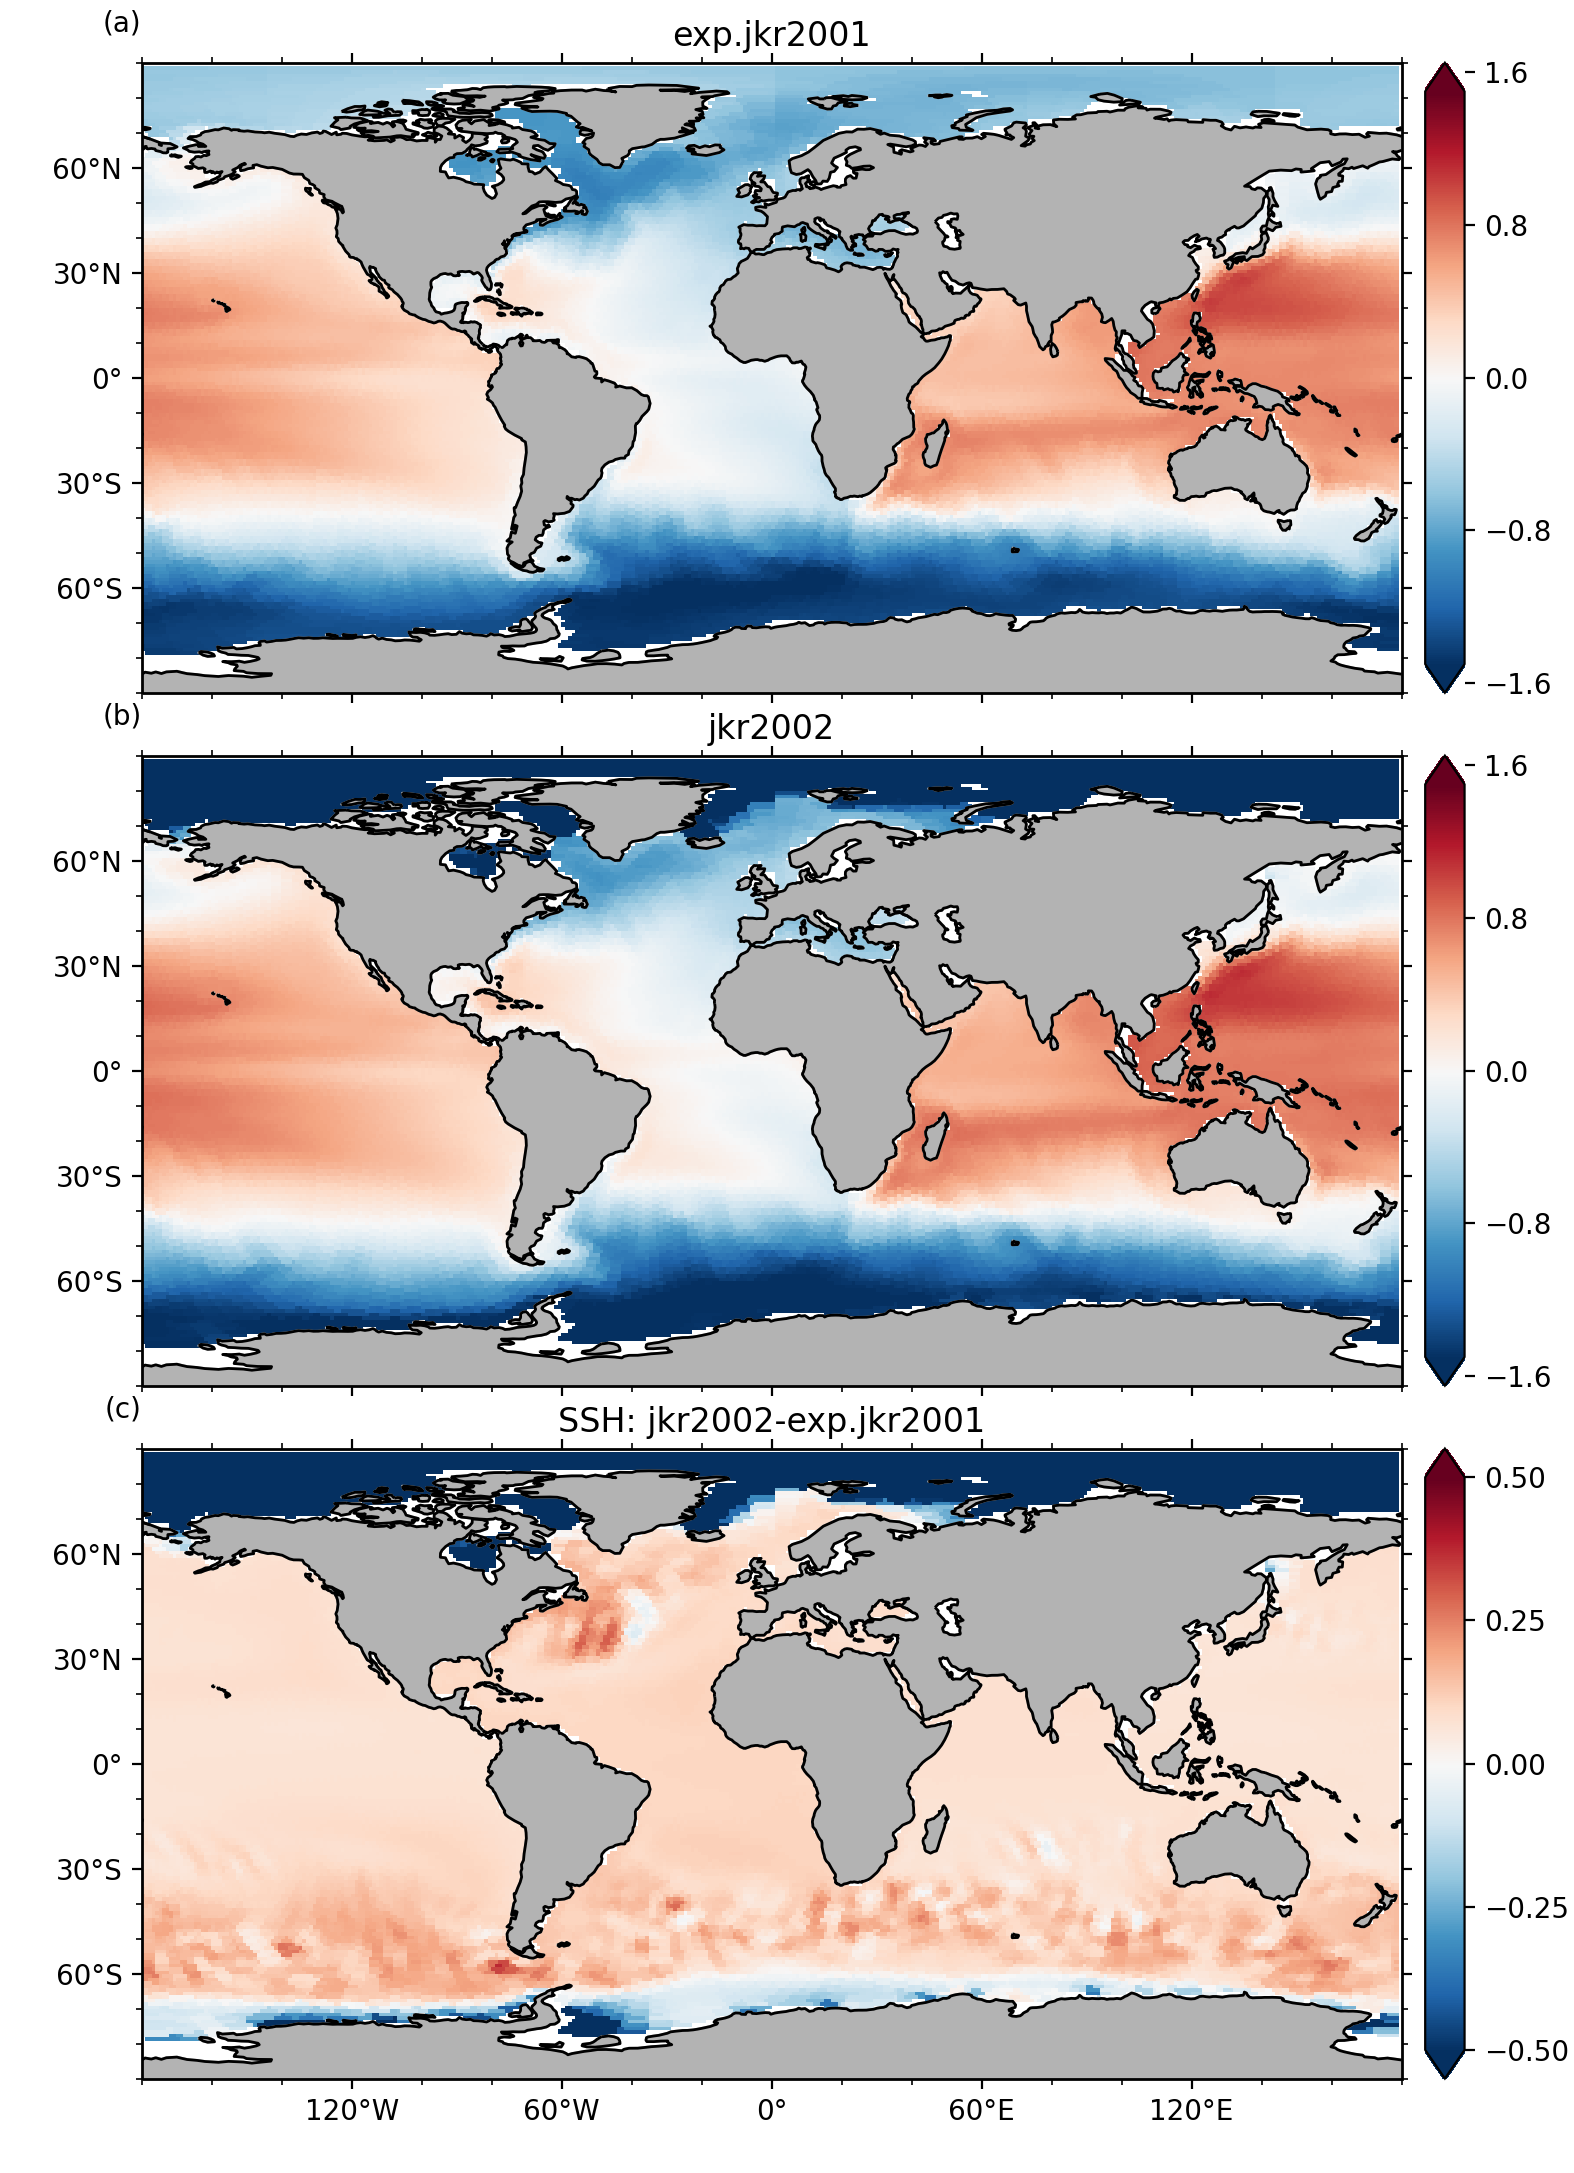

In [35]:
hca, hcb = pyic.arrange_axes(1,3, plot_cb=True, asp=0.5, fig_size_fac=2.,
                           sharex=True, sharey=True,
                           xlabel="", ylabel="",
                           projection=ccrs_proj,
                          )
ii=-1
clim = 1.5

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, zos1i, ax=ax, cax=cax, clim=clim,
              transform=ccrs_proj)
ax.set_title(f'{IcD1.run}')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, zos2i, ax=ax, cax=cax, clim=clim,
              transform=ccrs_proj)
ax.set_title(f'{IcD2.run}')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, zos2i-zos1i, ax=ax, cax=cax, clim=0.5,
              transform=ccrs_proj)
ax.set_title(f'SSH: {IcD2.run}-{IcD1.run}')


for ax in hca:
    pyic.plot_settings(ax, template='global')

## Line plot

<IPython.core.display.Javascript object>


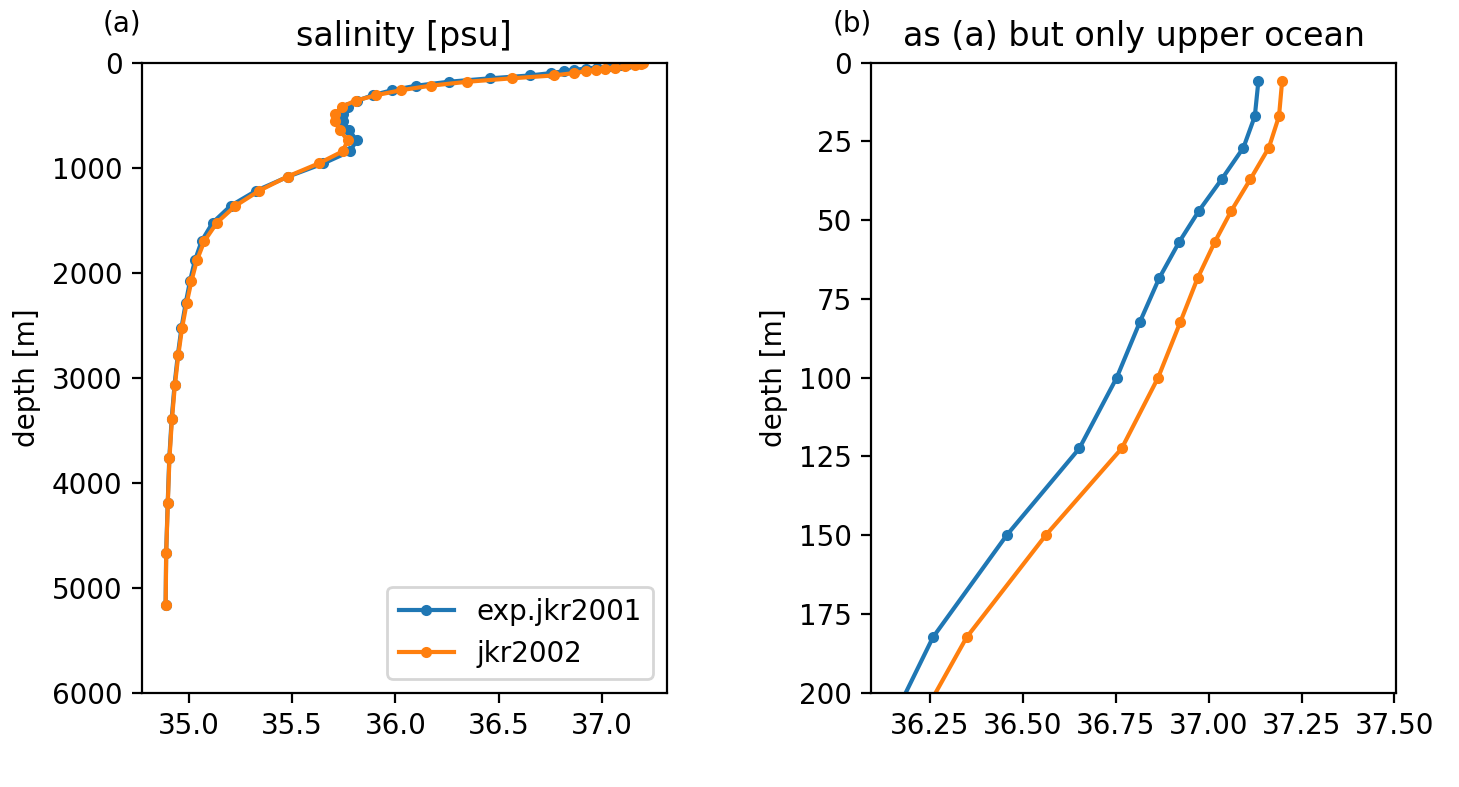

In [36]:
hca, hcb = pyic.arrange_axes(2,1, plot_cb=False, asp=1.2, fig_size_fac=2.,
                           sharex=False, sharey=False,
                           xlabel="", ylabel="depth [m]",
                          )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so1[:,ic1], IcD.depthc, marker='.', label=IcD1.run)
ax.plot(so2[:,ic1], IcD.depthc, marker='.', label=IcD2.run)
ax.set_title('salinity [psu]')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.plot(so1[:,ic1], IcD.depthc, marker='.')
ax.plot(so2[:,ic1], IcD.depthc, marker='.')
ax.set_title('as (a) but only upper ocean')

for nn, ax in enumerate(hca):
    if nn==0:
        ax.set_ylim(6000,0)
    elif nn==1:
        ax.set_ylim(200,0)
        ax.set_xlim(so1[:iz200,ic1].min()*0.99,so1[:iz200,ic1].max()*1.01)